In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
data = pd.read_csv(url)

# Seleccionar solo las columnas de interés
data = data[['Latitude', 'Longitude', 'MedInc']]

# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Visualizar las primeras filas del conjunto de entrenamiento y prueba
print(train_data.head())
print(test_data.head())

       Latitude  Longitude  MedInc
14196     32.71    -117.03  3.2596
8267      33.77    -118.16  3.8125
17445     34.66    -120.48  4.1563
14265     32.69    -117.11  1.9425
2271      36.78    -119.80  3.5542
       Latitude  Longitude  MedInc
20046     36.06    -119.01  1.6812
3024      35.14    -119.46  2.5313
15663     37.80    -122.44  3.4801
20484     34.28    -118.72  5.7376
9814      36.62    -121.93  3.7250


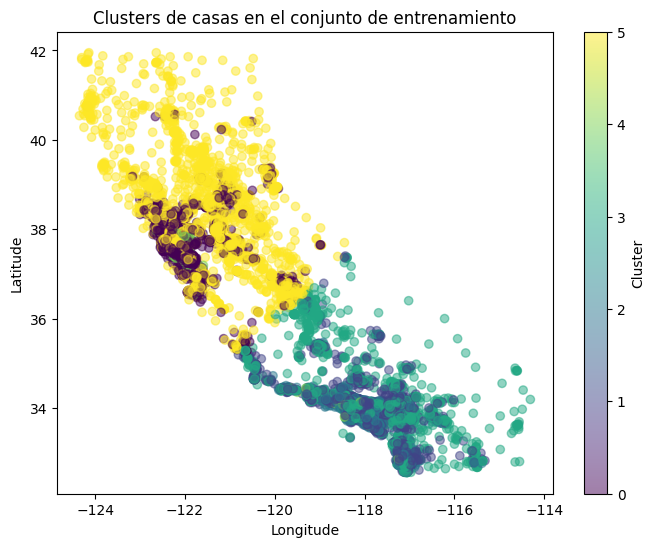

In [9]:
from sklearn.cluster import KMeans
import numpy as np

# Construir el modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_data[['Latitude', 'Longitude', 'MedInc']])

# Asignar los clusters al conjunto de entrenamiento
train_data['cluster'] = kmeans.labels_

# Visualizar los clusters en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas en el conjunto de entrenamiento')
plt.colorbar(label='Cluster')
plt.show()

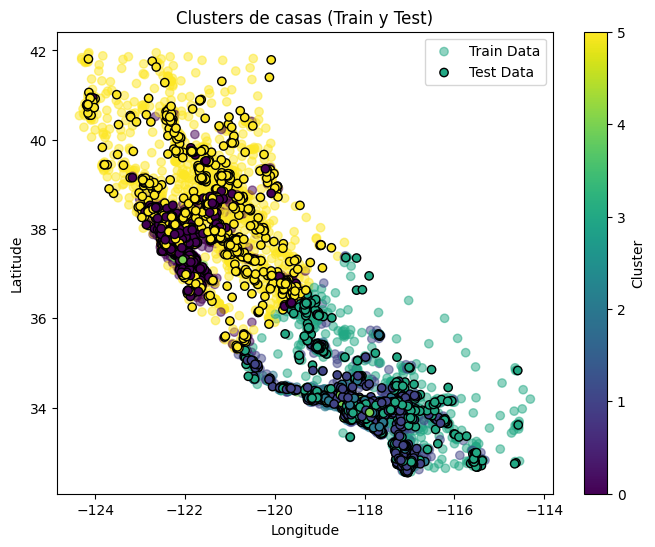

In [10]:
# Predecir los clusters para el conjunto de prueba
test_data['cluster'] = kmeans.predict(test_data[['Latitude', 'Longitude', 'MedInc']])

# Visualizar los clusters para el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5, label='Train Data')
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['cluster'], cmap='viridis', edgecolor='k', label='Test Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas (Train y Test)')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



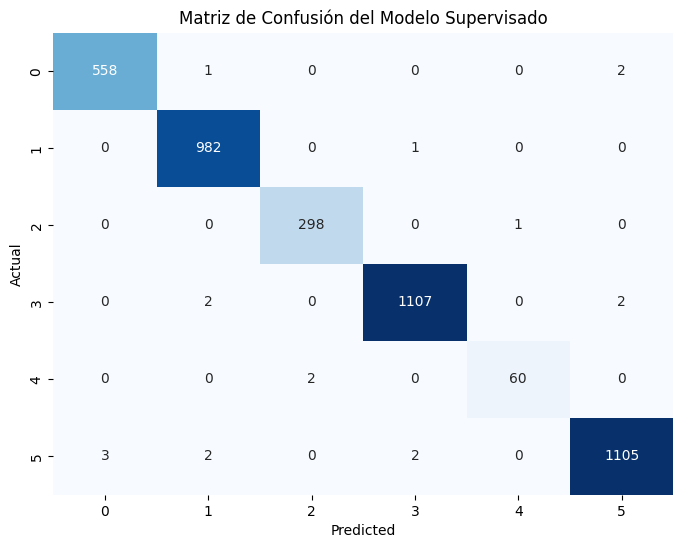

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Seleccionar las características y etiquetas del conjunto de entrenamiento
X_train = train_data[['Latitude', 'Longitude', 'MedInc']]
y_train = train_data['cluster']

# Entrenar el modelo de clasificación supervisada
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Seleccionar las características del conjunto de prueba
X_test = test_data[['Latitude', 'Longitude', 'MedInc']]
y_test = test_data['cluster']

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Modelo Supervisado')
plt.show()

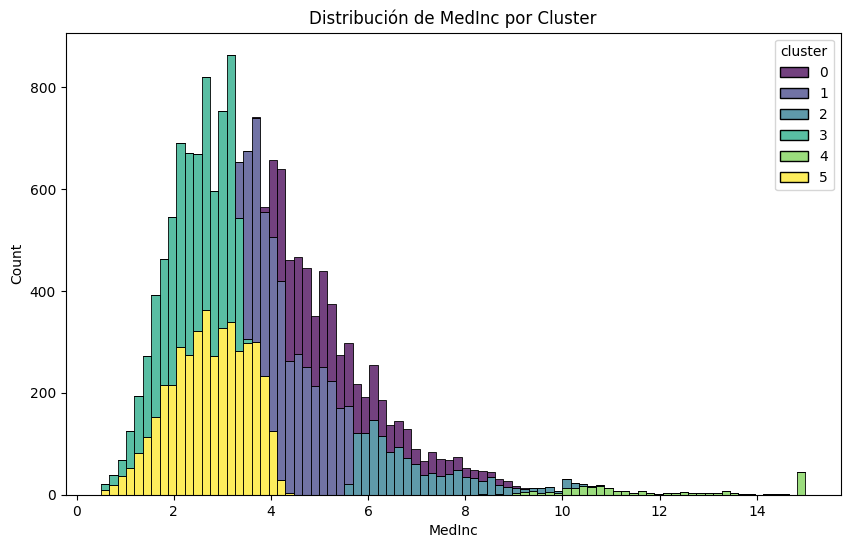

  cluster   Latitude             Longitude               MedInc          
                mean       std        mean       std       mean       std
0       0  37.686925  0.572868 -121.915650  0.607609   5.380158  1.124744
1       1  33.889414  0.562057 -118.002840  0.691385   4.348026  0.631529
2       2  33.849680  0.440044 -118.041547  0.597993   6.939476  1.110431
3       3  34.041557  0.765354 -118.024263  0.867471   2.428376  0.622707
4       4  35.878171  1.809735 -120.284228  1.948316  11.748734  1.908435
5       5  38.143742  1.095460 -121.623042  0.988019   2.740572  0.781223


In [12]:
# Visualizar la distribución de MedInc por cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='MedInc', hue='cluster', multiple='stack', palette='viridis')
plt.xlabel('MedInc')
plt.ylabel('Count')
plt.title('Distribución de MedInc por Cluster')
plt.show()

# Resumen estadístico por cluster
cluster_summary = train_data.groupby('cluster').agg({
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std'],
    'MedInc': ['mean', 'std']
}).reset_index()

print(cluster_summary)

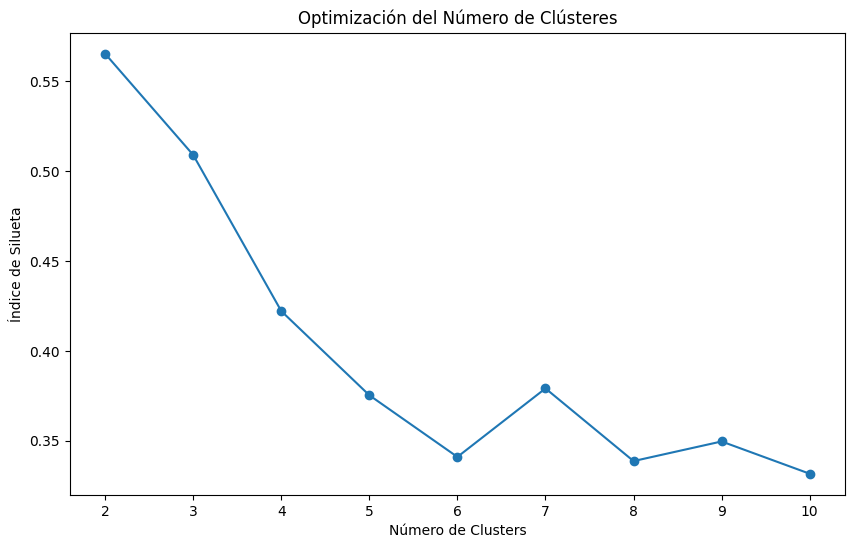

In [13]:
from sklearn.metrics import silhouette_score

# Evaluar el índice de silueta para diferentes números de clusters
silhouette_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(train_data[['Latitude', 'Longitude', 'MedInc']])
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(train_data[['Latitude', 'Longitude', 'MedInc']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualizar el índice de silueta para diferentes números de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silueta')
plt.title('Optimización del Número de Clústeres')
plt.show()